#### Polynomial Regression 

In [ ]:
Simple Linear Regression :                                                                                                    
      y = B0+B1*x             # (y=mx+c)    B0-intercept , B1-slope(coefficient)                                               
        
Multiple Linear Regresssion :                                                                                                   
    y=B0*1+B1*x1+B2*x2+B3*x3+.....+Bn*xn                                                                                      
             
Polynomial Linear Regression :                                                                                               
    y=B0*1+B1*x^1+B2*x^2+B3*x^3+......+Bn*x^n                  # ^ means - square                                             

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('Position_Salary.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [14]:
# X = dataset.iloc[:,1].values    # by this 1 column used here we get 1D array which not fits model and we need 2D array ,
                                 # we may add some more columns, So we have put in 2x2 matrix format
    
X = dataset.iloc[:,1:2].values    # we are taking Level column for position , bcoz it is in integer format easy to use also

y = dataset.iloc[:,2].values    # here we can use it 2 only bcoz it is dependent var. (Salary)

In [4]:
from sklearn.linear_model import LinearRegression           

linear_reg1 = LinearRegression()
linear_reg1.fit(X,y)


y_pred = linear_reg1.predict(X)

In [5]:
from sklearn.preprocessing import PolynomialFeatures           # Polynomial Linear Regression

poly_reg = PolynomialFeatures(degree=2)      # degree=1  for x , degree=2 for x^2  , we are taking upto 2 only here  
# we have independent features in eqn. (1, x, x^2, x^3...., x^n) <- degree parameter used.

In [6]:
# Now we transform X independent var. into polynomial regression var.

X_Poly = poly_reg.fit_transform(X)
X_Poly    # You can see 1st column for 1 value , 2nd for x^1 , 3rd for x^2  ,we used degree=2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [7]:
# Now this polynomilal feature  'X_Poly' we apply to linear regression

linear_reg2 = LinearRegression()
linear_reg2.fit(X_Poly,y)   # we are creating classifier for the Polynomial

y_pred_poly = linear_reg2.predict(X_Poly)

In [10]:
from sklearn.metrics import r2_score
r2_score(y_pred_poly, y)

0.9085450492252838

Now verify 

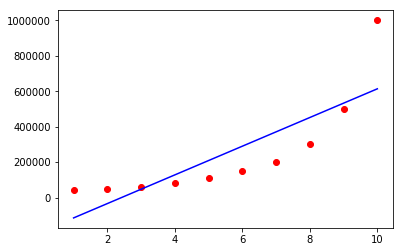

In [8]:
# Plotting the simple linear classifier

plt.scatter(X,y,color='red') 
plt.plot(X,y_pred, color='blue')
plt.show()                             # You can see residue is big, this simple linear regression not predict good values

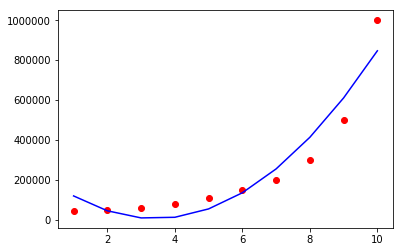

In [9]:
# Now implement Polynomial

plt.scatter(X,y, color='red')
plt.plot(X,y_pred_poly, color='blue')
plt.show()                           
# Now see polynomial line residue is less, Now change (degree=3 or 4) value, see it.